##### Algorithms and Data Structures (Winter - Spring 2022)

* [Colab view](https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_intro_3.ipynb)
* [nbviewer view](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_intro_3.ipynb)
* [ACSL / USACO](Exercises.ipynb)
* [Repo](https://github.com/4dsolutions/elite_school/)
* Main Text 
    -   [Algorithms](ADS_intro_1.ipynb) 
    -   [Algorithms (continued)](ADS_intro_2.ipynb)
    -   [Structured Data](ADS_intro_3.ipynb)
* Projects 
    -   [Wordle](ADS_project_1.ipynb)
* Research 
    -   [Word Sets and Graph Theory](ADS_research_1.ipynb)
* Sandboxes 
    -   [Spatial Geometry](ADS_sandbox.ipynb)  
    -   [Finite Groups](ADS_sandbox_2.ipynb)  
    -   [Chess](ADS_sandbox_3.ipynb)


# Operational Data Structures

The idea of data structures that come bundled with their own algorithms informs to Object Oriented Paradigm. 

The idea that types with internal state come with associated behaviors is taken directly from the object world of noun-things with verb-behaviors and adjective or other noun properties, also known as attributes. 

OO aims to mimic our native grammar and to facilitate reasoning about our programs by extending particular metaphors.

By space we might mean mailing addresses, but more likely (x,y) or (x,y,z) coordinate, or latitude and longitude, or other ways of fixing location.  Our "space" might be a canvas, where we paint or draw.

By time we probably mean something to do with the calendar, with with duration since the beginning of some experiment.  The features or qualities of an object may tend to change over time, and we may use some type of canvas (spatial) to convey those trends.

Spatial and temporal go together as concepts.  It's hard to think of one without the other, whereas it's easy to think of them both together.

## Time

The concept of time encompasses our ideas about a calendar consisting of dates (year-month-day) and datetimes (year-month-day hh\:mm\:ss), with units as small as nanoseconds or even smaller.

Our Gregorian calendar has resulted from a combination of design and historical happenstance.

### Time Zones

Time is anything but a simple concept.  First of all, clocks usually register a local time (in a timezone) relative to a more global time (GMT or UTC).  How does the local timezone relate to UTC, in terms of "ahead" or "behind"?

In [1]:
import time

In [2]:
from_string = time.strptime("Wed Mar 16 00:00:00 2022 -0800 PDT", "%a %b %d %H:%M:%S %Y %z %Z")
from_string

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=75, tm_isdst=1)

### Daylight Savings Time

There's a lot of inertia behind this practice, of shifting forward and back by one hour, near the solstices.  Even if people decide the practice is more trouble than it's worth, winding it down would require a lot of bureaucratic collaboration.  

Spring forward, Fall a back.

Notice the localtime structure below, which looks just like a named tuple.

In [3]:
import time
tct = the_current_time = time.localtime()
tct

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=20, tm_hour=12, tm_min=15, tm_sec=46, tm_wday=6, tm_yday=79, tm_isdst=1)

In [4]:
type(tct)

time.struct_time

In [5]:
tct.tm_gmtoff

-25200

In [6]:
tct.tm_zone

'PDT'

In [7]:
the_current_time.tm_isdst

1

How might we create one of these `time.struct_time` objects from scratch, and for some other time than "right now"?

First, interesting side note:

<blockquote>
    The epoch is the point where the time starts, and is platform dependent. For Unix, the epoch is January 1, 1970, 00:00:00 (UTC). To find out what the epoch is on a given platform, look at time.gmtime(0).  -- Python docs
    </blockquote>
    
Another side note:  

Is another Y2K coming?  (research topic)

<blockquote>
    The functions in this module may not handle dates and times before the epoch or far in the future. The cut-off point in the future is determined by the C library; for 32-bit systems, it is typically in 2038.
</blockquote>

In [8]:
time.asctime(time.gmtime(0))  # the epoch begins (UNIX standard)

'Thu Jan  1 00:00:00 1970'

In [9]:
time.strftime("%a, %d %b %Y %H:%M:%S +0000 %z %Z", time.gmtime())

'Sun, 20 Mar 2022 19:15:46 +0000 -0800 UTC'

In [10]:
time.ctime(28800)  # why this many seconds?  Answer:  because epoch is GMT

'Thu Jan  1 00:00:00 1970'

Back to our main question, the Python docs express some wry humor on the topic:

<blockquote>
    DST is Daylight Saving Time, an adjustment of the timezone by (usually) one hour during part of the year. DST rules are magic (determined by local law) and can change from year to year. The C library has a table containing the local rules (often it is read from a system file for flexibility) and is the only source of True Wisdom in this respect.
</blockquote>

In [11]:
time.strptime("Wed Mar 16 00:00:00 2022")

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=75, tm_isdst=-1)

That tm_isdst is -1 means we have constructed a time.struct_time that has no clue whether it's a daylight savings time datetime or not.  We can address this with additional inputs.

In [12]:
help(time.mktime)

Help on built-in function mktime in module time:

mktime(...)
    mktime(tuple) -> floating point number
    
    Convert a time tuple in local time to seconds since the Epoch.
    Note that mktime(gmtime(0)) will not generally return zero for most
    time zones; instead the returned value will either be equal to that
    of the timezone or altzone attributes on the time module.



In [13]:
time.localtime(time.mktime((2022,3,16,0,0,0,0,0,1)))

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=75, tm_isdst=1)

In [14]:
from_string = time.strptime("Wed Mar 16 00:00:00 2022 -0800 PDT", "%a %b %d %H:%M:%S %Y %z %Z")
from_string

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=16, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=75, tm_isdst=1)

In [15]:
from_string.tm_zone

'PDT'

In [16]:
from_string.tm_gmtoff  # difference from GMT in seconds

-28800

In [17]:
8 * 60 * 60  # 8 hours x 60 minutes x 60 seconds

28800

In [18]:
from_string = time.strptime("Wed Mar 13 00:00:00 2022 -0800 PST", "%a %b %d %H:%M:%S %Y %z %Z")
from_string

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=13, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=72, tm_isdst=0)

In [19]:
tct

time.struct_time(tm_year=2022, tm_mon=3, tm_mday=20, tm_hour=12, tm_min=15, tm_sec=46, tm_wday=6, tm_yday=79, tm_isdst=1)

In [20]:
import datetime

In [21]:
today = datetime.datetime.now()
today

datetime.datetime(2022, 3, 20, 12, 15, 46, 996508)

#### Moving to Numpy

numpy is a 3rd party package we use to boost Python's number crunching capabilities.  numpy provides the n-dimensional array (ndarray) as its star type, a combination of data structure and algorithms.  

numpy is very often used in conjunction with pandas, another 3rd party package that provides the data structure we call a DataFrame.  The DataFrame likewise comes with many behaviors or capabilities, which we may think of as algorithms.

Let's find [a tutorial](https://blog.finxter.com/how-to-work-with-dates-and-times-in-python/) and follow it at least part way.  I like how Adam Murphy gets back to basics by explaining the basic rules of  ISO 8601. I also like how he embeds a Replit from Repl.it.

This is a useful research workflow:  to curate and either partially or completely follow tutorials.  This tutorial is about using numpy, a 3rd party package.  numpy comes with its own datetime64 type, which is distinct from Python's native datetime.datetime.

In [77]:
import numpy as np
np.__version__

'1.17.3'

In [85]:
results = np.ones((2, 10, 10), dtype=np.int64)
results

array([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]])

In [86]:
results + 3

array([[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]],

       [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]])

In [23]:
# My Birthday: May 17, 1958
birthday = np.datetime64('1958-05-17')
today = np.datetime64('2022-03-16')

# Business Days passed:
passed = np.busday_count(birthday, today)
print('Number of Days passed since your birthday:')
print(passed)

Number of Days passed since your birthday:
16652


In [24]:
# 2000
print(np.datetime64('2000'))
 
# November 2000
print(np.datetime64('2000-11'))
 
# 22nd November 2000p
print(np.datetime64('2000-11-22'))
 
# 7th June 1987 at 16:22:44 (twenty two minutes past four in the afternoon and forty four seconds)
print(np.datetime64('2000-11-22 16:22:44'))

2000
2000-11
2000-11-22
2000-11-22T16:22:44


How many seconds are there between 1st March 2019 at 1 pm and 4th March 2019 at 2 am exactly? 219,600s

In [25]:
# Subtract both dates written with time unit 's'
result = np.datetime64('2019-03-04 02:00:00') - np.datetime64('2019-03-01 13:00:00')
result

numpy.timedelta64(219600,'s')

In [26]:
# Closest business day back in time is Friday 17th May 2019
sat_may_18 = np.datetime64('2019-05-18')  # a Saturday
np.busday_offset(sat_may_18, 0, roll='backward')

numpy.datetime64('2019-05-17')

In [27]:
days_of_march = np.arange('2022-03-01', '2022-04-01', dtype='datetime64[D]')
days_of_march[:10]

array(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
       '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
       '2022-03-09', '2022-03-10'], dtype='datetime64[D]')

In [28]:
weeks_of_march = np.arange('2022-03-01', '2022-03-31', dtype='datetime64[W]')
weeks_of_march

array(['2022-02-24', '2022-03-03', '2022-03-10', '2022-03-17',
       '2022-03-24'], dtype='datetime64[W]')

In [29]:
type(weeks_of_march[1])

numpy.datetime64

In [30]:
weeks_of_march[1].astype(datetime.datetime)

datetime.date(2022, 3, 3)

In [31]:
for day in weeks_of_march:
   print(day.astype(datetime.datetime).weekday(), end=" ") # Monday 0... Sunday 6

3 3 3 3 3 

In [32]:
for day in weeks_of_march:
   print(day.astype(datetime.datetime).isoweekday(), end=" ") # Monday 0... Sunday 6

4 4 4 4 4 

In [33]:
import pandas as pd

In [34]:
pd.Index

pandas.core.indexes.base.Index

In [35]:
import statsmodels

In [36]:
obj = pd.Series([4, 7, -5, 3])

In [37]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [38]:
obj.index.name = "ROWS"

In [39]:
obj

ROWS
0    4
1    7
2   -5
3    3
dtype: int64

In [40]:
obj.name = "SAMPLES"

In [41]:
obj

ROWS
0    4
1    7
2   -5
3    3
Name: SAMPLES, dtype: int64

In [ ]:
obj.array

In [ ]:
obj.index

In [ ]:
obj.index = pd.Index(('a','b','c','d'), name='ROWS')

In [ ]:
obj[obj>0]

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [ ]:
frame

In [ ]:
pop = {'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6},
     'Nevada': {2001: 2.4, 2002: 2.9}}
frame3 = pd.DataFrame(pop)

In [ ]:
frame3

In [ ]:
frame3.T

## Space

Space and time are not easily separable, as to pinpoint a place in space and not to say *when* it is, implying this "place" is accessible regardless of when.

One may easily miss a meeting, by showing up too late at the right street corner.  Showing up too early might not be a problem if it's OK to wait.

However, we're able to distill space to an essential "extension" ("res extensa" they called it in Latin) wherein we're able to trace patterns independently of a time dimension.

We're able to draw circles, parabolas, hyperbolas, ellipses (the "conic sections").  

We're also able to sculpt cones, cylinders, spheres, and polyhedrons.

### Painting and Plotting

Lets draw a parabola.  We learn in school that we might plot a a mathematical relationship between an X and a Y on an XY graph.  X and Y form a pair of Axes.  Axes become a basic unit of data visualization, wherever "2D plots" are concerned.

In [45]:
x = domain = np.linspace(-5, 5, 100)
domain[[0, -1]]  # show first and last points

array([-5.,  5.])

Use code such as the above for any of your textbook exercises calling for ploting (domain, range) pairs, where the range is the output of some function taking the domain as input.  

We call such a function a mapping, like a Python dictionary.  

Any given input will only ever map to the same unique output.  

But that's not to say multiple inputs must have unique outputs.  Many-to-one is fine.  Many people may have the same age.

One-to-many is what we call a relation, not a function.  Relations form a superset.

How might we display this Relation > Function superset idea using matplotlib?

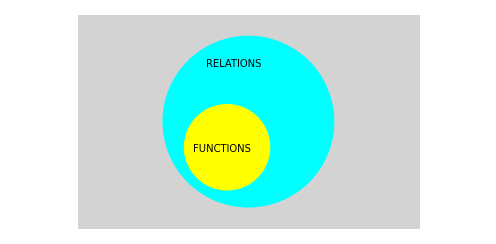

In [74]:
import matplotlib
from matplotlib import pyplot as plt, patches
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
rect = patches.Rectangle((2, 2), 8, 5, color='lightgray')
circle1 = patches.Circle((6, 4.5), radius=2, color='cyan')
circle2 = patches.Circle((5.5, 3.9), radius=1, color='yellow')
ax.add_patch(rect)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.text(5, 5.8, "RELATIONS", color="black")
plt.text(4.7, 3.8, "FUNCTIONS", color="black")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('equal')
plt.axis('off')
plt.show()

Let's remind ourselves of our domain, of 100 data points evenly spaced between `[-5, 5]` inclusive:

In [46]:
len(domain)

100

Now comes the fun part:  defining a rule to take all our domain points to corresponding range points.  Since `range` is a keyword in Python, we'll avoid using it as a name.  

Lowercase y will do fine.  

We write:  

$$
y = f(x)
$$

Note about Scope:  In the list comprehension below, the the x value stays local to the pair of brackets and does not overwrite our global x, i.e. domain.  

On the other hand, the global name `domain` is readable from within the brackets, and remains unchanged.

In [47]:
y = [pow(x, 2) for x in domain]  # local x, global domain

In [76]:
type(x)  # still an array

numpy.ndarray

Now we're ready to use a pandas DataFrame, which has some built-in plotting capabilities.

In [50]:
chart = pd.DataFrame({"X": x, "Y": y})

In [61]:
chart.head() # far left

,X,Y
0,-5.00000,25.000000
1,-4.89899,24.000102
2,-4.79798,23.020610
3,-4.69697,22.061524
4,-4.59596,21.122845


In [59]:
chart.loc[list(range(45,56))]  # bottom of parabola

,X,Y
45,-0.454545,0.206612
46,-0.353535,0.124987
47,-0.252525,0.063769
48,-0.151515,0.022957
49,-0.050505,0.002551
50,0.050505,0.002551
51,0.151515,0.022957
52,0.252525,0.063769
53,0.353535,0.124987
54,0.454545,0.206612


In [60]:
chart.tail()  # far right

,X,Y
95,4.59596,21.122845
96,4.69697,22.061524
97,4.79798,23.020610
98,4.89899,24.000102
99,5.00000,25.000000


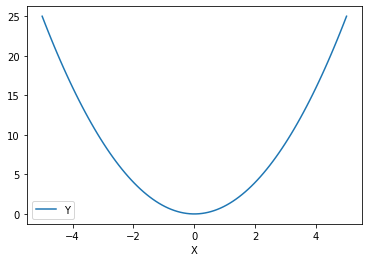

In [55]:
chart.plot(x='X'); # x axis corresponds to X